<a href="https://colab.research.google.com/github/fedhere/UInotebooks/blob/master/dataWrangling/dataWranglingColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas for Data Analysis Chapter 7:
# Data wrangling: Clean, Transform, Merge, Reshape

#### Complete trascription of the code in Chapter 7 of Python for Data Analysis
#### By Wes McKinney, 2013
#### with a few additional comments and demonstration cells
#### trascripted by [Federica B. Bianco](http://fbb.space) ([fedhere](http://github.com/fedhere)) for CUSP [PUI2016](http://cosmo.nyu.edu/~fb55/PUI2016)

## Combining and Merging Datasets

### Database Style DataFrame Merges

In [1]:
from __future__ import division, print_function
import os
import numpy as np
from numpy.random import randn
import pylab as pl

from pandas import Series, DataFrame
import pandas
import pandas as pd

In [2]:
# setting up some preferences
%pylab inline

np.set_printoptions(precision=4, threshold=500)
np.random.seed(123321)
pl.rc('figure', figsize=(10, 6))
pd.options.display.max_rows = 100

Populating the interactive namespace from numpy and matplotlib


In [3]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})

In [4]:
df2 = DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})

In [5]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [6]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [7]:
pd.merge(df1, df2)   

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [8]:
pd.merge(df1, df2, on='key')  

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [9]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})

In [10]:
df4 = DataFrame({'rkey': ['a', 'b','d'], 'data2': range(3)})

In [11]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')  

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [12]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [13]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6)})

In [14]:
df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'], 'data2': range(5)})

In [15]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [16]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [17]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [18]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [19]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                 'key2': ['one', 'two', 'one'],
                 'lval': [1,2,3]})

In [20]:
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                 'key2': ['one', 'one', 'one', 'two'],
                 'rval': [4, 5, 6, 7]})

In [21]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [22]:
pd.merge(left, right, on='key1')   

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [23]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))    #key1 값을 키값으로 하여 suffixes 인자를 주어 머지 수행

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Merging on Index

In [24]:
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                  'value': range(6)})
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [25]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [26]:
right1

,group_val
a,3.5
b,7.0


In [27]:
pd.merge(left1, right1, left_on='key', right_index=True)   

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [28]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer') 

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


#### alternative way to create dataframes, while forcing the indices

In [29]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                   'key2': [2000, 2001, 2002, 2001, 2002],
                   'data': np.arange(5.)})
righth = DataFrame(np.arange(12).reshape((6, 2)),
                   index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=['event1', 'event2'])
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [30]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [31]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)   

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [32]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True, how='outer')   

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [33]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],
                 columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])

In [34]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [35]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [36]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


#### joins (merge is a pandas function, join is a property of the dataframe class)

In [37]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [38]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [39]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [40]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [41]:
left.join([right2, another], how='outer')

,key1,key2,lval,Missouri,Alabama,New York,Oregon
0,foo,one,1.0,NaN,NaN,NaN,NaN
1,foo,two,2.0,NaN,NaN,NaN,NaN
2,bar,one,3.0,NaN,NaN,NaN,NaN
a,NaN,NaN,NaN,NaN,NaN,7.0,8.0
b,NaN,NaN,NaN,7.0,8.0,NaN,NaN
c,NaN,NaN,NaN,9.0,10.0,9.0,10.0
d,NaN,NaN,NaN,11.0,12.0,NaN,NaN
e,NaN,NaN,NaN,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,NaN,16.0,17.0


### Concatenating Along an Axis

In [42]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [43]:
np.concatenate([arr, arr], axis=1)  

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [44]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])

In [45]:
pd.concat([s1, s2, s3])  

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [46]:
pd.concat([s1, s2, s3], axis=1)   

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [47]:
s4 = pd.concat([s1 * 5, s3])

In [48]:
pd.concat([s1, s4], axis=1, join='inner')  

,0,1
a,0,0
b,1,5


In [49]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [50]:
result.unstack()   

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [51]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [52]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                columns=['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                columns=['three', 'four'])
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])   #keys의를 다음과 같이 설정하여 df1, df2에 대해 concat수행

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [53]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [54]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'], names=['upper', 'lower'])   

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [55]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [56]:
df1

,a,b,c,d
0,0.905201,-0.621669,1.267844,-1.381850
1,-0.548407,0.340444,1.370516,0.454167
2,0.865425,0.300580,0.376308,-1.514473


In [57]:
df2

,b,d,a
0,0.999249,0.610440,-0.554306
1,-1.097507,-1.622026,-0.020096


In [58]:
pd.concat([df1, df2])

,a,b,c,d
0,0.905201,-0.621669,1.267844,-1.381850
1,-0.548407,0.340444,1.370516,0.454167
2,0.865425,0.300580,0.376308,-1.514473
0,-0.554306,0.999249,NaN,0.610440
1,-0.020096,-1.097507,NaN,-1.622026


In [59]:
pd.concat([df1, df2], ignore_index=True)   

,a,b,c,d
0,0.905201,-0.621669,1.267844,-1.381850
1,-0.548407,0.340444,1.370516,0.454167
2,0.865425,0.300580,0.376308,-1.514473
3,-0.554306,0.999249,NaN,0.610440
4,-0.020096,-1.097507,NaN,-1.622026


### Combining Data with Overlap

In [60]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64),
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan

In [61]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [62]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [63]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [64]:
b[:-2].combine_first(a[2:])   

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [65]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
                 'b': [np.nan, 2., np.nan, 6.],
                 'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## Reshaping and Pivoting

### Reshaping with Hierarchical Indexing

In [66]:
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [67]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [68]:
result.unstack()   

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [69]:
result.unstack(0)   

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [70]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [71]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [72]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [73]:
data2.unstack().stack(dropna=False)   

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [74]:
df = DataFrame({'left': result, 'right': result + 5},
               columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [75]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [76]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### Pivoting "long" and "wide" Format

In [77]:
data = pd.read_csv('https://raw.githubusercontent.com/fedhere/UInotebooks/master/dataWrangling/macrodata.csv')
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
data = DataFrame(data.to_records(),
                 columns=pd.Index(['realgdp', 'infl', 'unemp'], name='item'),
                 index=periods.to_timestamp('D', 'end'))

ldata = data.stack().reset_index().rename(columns={0: 'value'})
wdata = ldata.pivot('date', 'item', 'value')

In [78]:
ldata[:10]

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


In [79]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [80]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,0.511763
1,1959-03-31 23:59:59.999999999,infl,0.000,-0.911488
2,1959-03-31 23:59:59.999999999,unemp,5.800,-0.137122
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,0.329000
4,1959-06-30 23:59:59.999999999,infl,2.340,-2.334356
5,1959-06-30 23:59:59.999999999,unemp,5.100,0.146831
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,-1.478915
7,1959-09-30 23:59:59.999999999,infl,2.740,0.251897
8,1959-09-30 23:59:59.999999999,unemp,5.300,-0.713260
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,-1.382798


In [81]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

value            ...    value2          
item                           infl   realgdp  ...   realgdp     unemp
date                                           ...                    
1959-03-31 23:59:59.999999999  0.00  2710.349  ...  0.511763 -0.137122
1959-06-30 23:59:59.999999999  2.34  2778.801  ...  0.329000  0.146831
1959-09-30 23:59:59.999999999  2.74  2775.488  ... -1.478915 -0.713260
1959-12-31 23:59:59.999999999  0.27  2785.204  ... -1.382798  0.403352
1960-03-31 23:59:59.999999999  2.31  2847.699  ...  0.808621  0.621248

[5 rows x 6 columns]

In [82]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [83]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

value            ...    value2          
item                           infl   realgdp  ...   realgdp     unemp
date                                           ...                    
1959-03-31 23:59:59.999999999  0.00  2710.349  ...  0.511763 -0.137122
1959-06-30 23:59:59.999999999  2.34  2778.801  ...  0.329000  0.146831
1959-09-30 23:59:59.999999999  2.74  2775.488  ... -1.478915 -0.713260
1959-12-31 23:59:59.999999999  0.27  2785.204  ... -1.382798  0.403352
1960-03-31 23:59:59.999999999  2.31  2847.699  ...  0.808621  0.621248
1960-06-30 23:59:59.999999999  0.14  2834.390  ... -0.855086  1.811646
1960-09-30 23:59:59.999999999  2.70  2839.022  ...  0.534187  0.654899

[7 rows x 6 columns]

## Data Transformtion

### Removing Duplicates

In [84]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [85]:
data.duplicated()   #duplicated 메서드는 각 로우가 중복인지 아닌지를 알려주는 불리언 Series 객체를 반환

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [86]:
data.drop_duplicates()   #duplicated에서 false인 dataFrame을 반환

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [87]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


In [97]:
data.drop_duplicates(['k1', 'k2'], keep="last")

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


### Transforming Data Using a Function or Mapping

In [98]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [99]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [100]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)  
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [101]:
data['food'].map(lambda x: meat_to_animal[x.lower()])  

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Replacing Values

In [102]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [103]:
data.replace(-999, np.nan)  

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [104]:
data.replace([-999, -1000], np.nan)   

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [105]:
data.replace([-999, -1000], [np.nan, 0])   

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [106]:
data.replace({-999: np.nan, -1000: 0})   

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

###  Renaming Axis Indexes

In [107]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

In [108]:
data.index.map(str.upper)   

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

In [109]:
data.index = data.index.map(str.upper)  
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [110]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [111]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [112]:
# Always returns a reference to a DataFrame
_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True)  
data

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


### Discretization and Binning

In [113]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [114]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [118]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [119]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [120]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [121]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']  
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [122]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

[(0.082, 0.31], (0.082, 0.31], (0.75, 0.97], (0.75, 0.97], (0.53, 0.75], ..., (0.082, 0.31], (0.75, 0.97], (0.082, 0.31], (0.082, 0.31], (0.75, 0.97]]
Length: 20
Categories (4, interval[float64]): [(0.082, 0.31] < (0.31, 0.53] < (0.53, 0.75] < (0.75, 0.97]]

In [123]:
data = np.random.randn(1000) # Normally distributed
cats = pd.qcut(data, 4) # Cut into quartiles
cats

[(-0.0718, 0.616], (-3.256, -0.719], (0.616, 3.717], (-0.0718, 0.616], (-3.256, -0.719], ..., (-3.256, -0.719], (-0.0718, 0.616], (-0.0718, 0.616], (-3.256, -0.719], (-3.256, -0.719]]
Length: 1000
Categories (4, interval[float64]): [(-3.256, -0.719] < (-0.719, -0.0718] < (-0.0718, 0.616] <
                                    (0.616, 3.717]]

In [124]:
pd.value_counts(cats)

(0.616, 3.717]       250
(-0.0718, 0.616]     250
(-0.719, -0.0718]    250
(-3.256, -0.719]     250
dtype: int64

In [125]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])  

[(-0.0718, 1.278], (-1.253, -0.0718], (1.278, 3.717], (-0.0718, 1.278], (-1.253, -0.0718], ..., (-3.256, -1.253], (-0.0718, 1.278], (-0.0718, 1.278], (-3.256, -1.253], (-1.253, -0.0718]]
Length: 1000
Categories (4, interval[float64]): [(-3.256, -1.253] < (-1.253, -0.0718] < (-0.0718, 1.278] <
                                    (1.278, 3.717]]

### Detecting and Filtering Outliers

In [126]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [127]:
data

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570
...,...,...,...,...
995,1.089085,0.251232,-1.451985,1.653126
996,-0.478509,-0.010663,-1.060881,-1.502870
997,-1.946267,1.013592,0.037333,0.133304
998,-1.293122,-0.322542,-0.782960,-0.303340


In [128]:
col = data[3]

In [129]:
col[np.abs(col) > 3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [130]:
data[(np.abs(data) > 3).any(1)]   

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [131]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()   

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


### Permutation and Random Sampling

In [132]:
df = DataFrame(np.arange(5*4).reshape(5, 4))

In [133]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [134]:
sampler = np.random.permutation(5)   
sampler

array([1, 0, 2, 3, 4])

In [135]:
df.take(sampler)   

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [136]:
tmp = np.array([1,2])
tmp

array([1, 2])

In [137]:
df.take(tmp)

,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [138]:
df.take(np.random.permutation(len(df)))  

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
4,16,17,18,19
0,0,1,2,3
2,8,9,10,11


In [139]:
bag = np.array([5, 7, -1, 6, 4])

In [140]:
sampler = np.random.randint(0, len(bag), size=10)   #0부터 4까지 size 10까지 난수를 생성   len(bag)=5
sampler

array([4, 4, 2, 2, 2, 0, 3, 0, 4, 1])

In [141]:
draws = bag.take(sampler)
draws

array([ 4,  4, -1, -1, -1,  5,  6,  5,  4,  7])

### Computing indicator/Dymmy Variables

In [142]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [143]:
pd.get_dummies(df['key'])  

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [144]:
dummies = pd.get_dummies(df['key'], prefix='key')
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [145]:
df_with_dummy = df[['data1']].join(dummies)   
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [146]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('https://raw.githubusercontent.com/fedhere/UInotebooks/master/dataWrangling/movies.dat',
                       sep='::', header=None, names=mnames)   
movies

/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [147]:
type(movies)

pandas.core.frame.DataFrame

In [148]:
genre_iter = (set(x.split('|')) for x in movies.genres)   
genres = sorted(set.union(*genre_iter))                  

In [149]:
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [150]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres) 
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
for i, gen in enumerate(movies.genres):   
  dummies.loc[i, gen.split('|')] = 1       

In [160]:
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.loc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [163]:
movies_windic.head()

,movie_id,title,genres,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
values = np.random.randn(10)
values

array([ 0.325 ,  0.2038,  0.3489,  0.516 , -0.4898, -0.6287,  0.2664,
        1.0837,  0.3033, -1.1072])

In [165]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [166]:
pd.get_dummies(pd.cut(values, bins))


,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,1,0,0,0
7,0,0,0,0,0
8,0,1,0,0,0
9,0,0,0,0,0


## String Manipulation

### String Object Methods

In [167]:
val = 'a, b, guido'

In [168]:
val.split(',')    

['a', ' b', ' guido']

In [169]:
pieces = [x.strip() for x in val.split(',')]  
pieces

['a', 'b', 'guido']

In [170]:
first, second, third = pieces
first + '::' + second + '::' + third   

'a::b::guido'

In [171]:
'::'.join(pieces)

'a::b::guido'

In [172]:
val

'a, b, guido'

In [173]:
'guido' in val  

True

In [174]:
val.index(',')   

1

In [175]:
val.find(':')   

-1

In [176]:
val.count(',')  

2

In [177]:
val.replace(',', '::')  

'a:: b:: guido'

In [178]:
val.replace(',', '')    

'a b guido'

### Regular Expressions

In [179]:
import re

In [180]:
text = "foo   bar\t baz   \tqux"

In [181]:
text

'foo   bar\t baz   \tqux'

In [182]:
re.split('\s+', text)   

['foo', 'bar', 'baz', 'qux']

In [183]:
regex = re.compile('\s+')

In [184]:
regex

re.compile(r'\s+', re.UNICODE)

In [185]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [186]:
regex.findall(text)

['   ', '\t ', '   \t']

In [187]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

regex = re.compile(pattern, flags=re.IGNORECASE)

In [188]:
regex.findall(text)   

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [189]:
m = regex.search(text)   

In [190]:
text[m.start():m.end()]   

'dave@google.com'

In [191]:
text[m.start()]  

'd'

In [192]:
text[m.end()]

'\n'

In [193]:
print (regex.match(text))

None


In [194]:
print (regex.sub('REDACTED', text))   

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [195]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [196]:
print (pattern)
print (regex)

([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})
re.compile('([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})', re.IGNORECASE)


In [197]:
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [198]:
regex.findall(text)   

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [199]:
print (regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))


Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



In [200]:
regex = re.compile(r"""
    (?P<username>[A-Z0-9._%+-]+)
    @
    (?P<domain>[A-Z0-9.-]+)
    \.
    (?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)  

In [201]:
m = regex.match('wes@bright.net')   
m.groupdict()

{'domain': 'bright', 'suffix': 'net', 'username': 'wes'}

### Vectorized string functions in Pandas

In [202]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [203]:
data.isnull()   

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [204]:
data.str.contains('gmail')   

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [205]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [206]:
data.str.findall(pattern, flags=re.IGNORECASE)  

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [207]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [211]:
data.str[:5]  

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

In [212]:
# cell added to generate a Python 2 & 3 compatible url scrapper
import json
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

def get_jsonparsed_data(url):
    """
    from http://stackoverflow.com/questions/12965203/how-to-get-json-from-webpage-into-python-script
    Receive the content of ``url``, parse it as JSON and return the object.
    Parameters
    ----------
    url : str
    Returns
    -------
    dict
    """
    response = urllib.urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)



## Example: USDA Food Database

In [215]:
db = get_jsonparsed_data('https://fbb.space/mltsa/foods-2011-10-03.json')
len(db)

6636

In [216]:
db[0]

{'description': 'Cheese, caraway',
 'group': 'Dairy and Egg Products',
 'id': 1008,
 'manufacturer': '',
 'nutrients': [{'description': 'Protein',
   'group': 'Composition',
   'units': 'g',
   'value': 25.18},
  {'description': 'Total lipid (fat)',
   'group': 'Composition',
   'units': 'g',
   'value': 29.2},
  {'description': 'Carbohydrate, by difference',
   'group': 'Composition',
   'units': 'g',
   'value': 3.06},
  {'description': 'Ash', 'group': 'Other', 'units': 'g', 'value': 3.28},
  {'description': 'Energy',
   'group': 'Energy',
   'units': 'kcal',
   'value': 376.0},
  {'description': 'Water',
   'group': 'Composition',
   'units': 'g',
   'value': 39.28},
  {'description': 'Energy', 'group': 'Energy', 'units': 'kJ', 'value': 1573.0},
  {'description': 'Fiber, total dietary',
   'group': 'Composition',
   'units': 'g',
   'value': 0.0},
  {'description': 'Calcium, Ca',
   'group': 'Elements',
   'units': 'mg',
   'value': 673.0},
  {'description': 'Iron, Fe',
   'group': 

In [217]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [218]:
db[0]['nutrients'][1]

{'description': 'Total lipid (fat)',
 'group': 'Composition',
 'units': 'g',
 'value': 29.2}

In [219]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [220]:
info_keys = ['description', 'group', 'id', 'manufacturer']

In [221]:
info = DataFrame(db, columns=info_keys)

In [222]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [223]:
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


In [224]:
pd.value_counts(info.group)[:10]   

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [225]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)   

In [226]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [227]:
nutrients.duplicated().sum()   

14179

In [228]:
nutrients = nutrients.drop_duplicates()   

In [229]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [230]:
col_mapping = {'description' : 'food',
               'group' : 'fgroup'}

In [231]:
info = info.rename(columns=col_mapping, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


In [232]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}

In [233]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [234]:
ndata = pd.merge(nutrients, info, on='id', how='outer')   
ndata

,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
0,25.180,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.200,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.060,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.280,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.000,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
...,...,...,...,...,...,...,...,...
375171,0.000,mcg,"Vitamin B-12, added",Vitamins,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375172,0.000,mg,Cholesterol,Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375173,0.072,g,"Fatty acids, total saturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375174,0.028,g,"Fatty acids, total monounsaturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None


In [236]:
ndata.iloc[30000]  

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

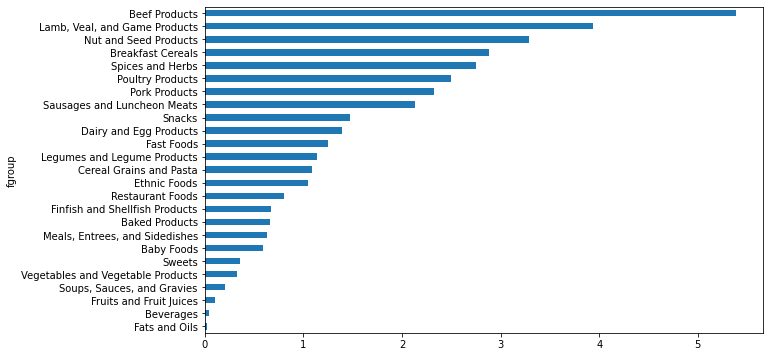

In [241]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')  

In [242]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())   
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make it smaller
max_foods.food = max_foods.food.str[:50]   

In [244]:
max_foods.loc['Amino Acids']['food']  

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

In [245]:
by_nutrient

In [246]:
max_foods

value                                               food
nutgroup    nutrient                                                                                         
Amino Acids Alanine                                  8.009                  Gelatins, dry powder, unsweetened
            Arginine                                 7.436                       Seeds, sesame flour, low-fat
            Aspartic acid                           10.203                                Soy protein isolate
            Cystine                                  1.307       Seeds, cottonseed flour, low fat (glandless)
            Glutamic acid                           17.452                                Soy protein isolate
            Glycine                                 19.049                  Gelatins, dry powder, unsweetened
            Histidine                                2.999         Whale, beluga, meat, dried (Alaska Native)
            Hydroxyproline                           0.803  KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
            Isoleucine                               4.300  Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
            Leucine                                  7.200  Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
            Lysine                                   6.690  Seal, bearded (Oogruk), meat, dried (Alaska Na...
            Methionine                               1.859              Fish, cod, Atlantic, dried and salted
            Phenylalanine                            4.600  Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
            Proline                                 12.295                  Gelatins, dry powder, unsweetened
            Serine                                   4.600  Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
            Threonine                                3.300  Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
            Tryptophan                               1.600   Sea lion, Steller, meat with fat (Alaska Native)
            Tyrosine                                 3.300  Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
            Valine                                   4.500  Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Composition Adjusted Protein                        12.900             Baking chocolate, unsweetened, squares
            Carbohydrate, by difference            100.000        Sweeteners, tabletop, fructose, dry, powder
            Fiber, total dietary                    79.000                                   Corn bran, crude
            Protein                                 88.320  Soy protein isolate, potassium type, crude pro...
            Sugars, total                           99.800                                 Sugars, granulated
            Total lipid (fat)                      100.000                                    Oil, wheat germ
            Water                                  100.000                      Water, bottled, POLAND SPRING
Elements    Calcium, Ca                           7364.000  Leavening agents, baking powder, double-acting...
            Copper, Cu                              15.050  Veal, variety meats and by-products, liver, co...
            Fluoride, F                            584.000  Tea, instant, sweetened with sugar, lemon-flav...
            Iron, Fe                                87.470      Salad dressing, russian dressing, low calorie
            Magnesium, Mg                          781.000                                   Rice bran, crude
            Manganese, Mn                          133.000   Tea, instant, unsweetened, powder, decaffeinated
            Phosphorus, P                         9918.000  Leavening agents, baking powder, double-acting...
            Potassium, K                         16500.000                  Leavening agents, cream of tartar
            Selenium, Se                          1917.000                Nuts, brazilnuts, d